In [1]:
import pandas
import numpy
import datetime
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
eleInpFile = "/home/bharat/Desktop/poesTest/eleflux.csv"
proInpFile = "/home/bharat/Desktop/poesTest/proflux.csv"
eleDF = pandas.read_csv(eleInpFile, sep=' ')
proDF = pandas.read_csv(proInpFile, sep=' ')
eleDF["date"] = pandas.to_datetime( eleDF["date"] )
proDF["date"] = pandas.to_datetime( proDF["date"] )

In [3]:
# select data for a datetime & lat range
selDate = datetime.datetime( 2015,6,17,9 ) 
timeInterval = datetime.timedelta( minutes=45 )
eleDF = eleDF[ (eleDF["date"] > selDate-timeInterval)\
                & (eleDF["date"] < selDate+timeInterval)
                 & (eleDF["aacgm_lat_foot"] > 40.)\
                 & ( (eleDF["MLT"] > 15.) | (eleDF["MLT"] < 6.))]
proDF = proDF[ (proDF["date"] > selDate-timeInterval)\
                & (proDF["date"] < selDate+timeInterval)\
                 & (proDF["aacgm_lat_foot"] > 40.)\
                 & ( (proDF["MLT"] > 15.) | (proDF["MLT"] < 6.))]
# we'll groupby things by 0.5 degrees in latitude,
# so round of latitudes to 0.5 deg
eleDF["MLAT"] = [round(x * 2.0) / 2.0 for x in eleDF['aacgm_lat_foot']]
proDF["MLAT"] = [round(x * 2.0) / 2.0 for x in proDF['aacgm_lat_foot']]
# print eleDF[ (eleDF["sat"] == "n19") ][ ["MLAT", "MLT"] ]

In [4]:
eleMlatMean = eleDF.groupby( ["MLAT", "sat"] ).mean().reset_index()
proMlatMean = proDF.groupby( ["MLAT", "sat"] ).mean().reset_index()
eleMlatMean.head()

,MLAT,sat,timestamp,aacgm_lat_foot,aacgm_lon_foot,MLT,log_ele_flux,dateStr,time
0,40.0,m01,1.434529e+12,40.209999,256.670013,20.309999,2.501196,20150617.0,816.000000
1,40.0,m02,1.434532e+12,40.090000,245.110001,20.299999,2.750215,20150617.0,903.000000
2,40.5,m01,1.434529e+12,40.580002,256.440002,20.290001,2.501196,20150617.0,816.000000
3,40.5,m02,1.434532e+12,40.470001,244.910004,20.290001,2.576572,20150617.0,903.000000
4,40.5,n15,1.434532e+12,40.453334,190.883331,16.643333,3.213916,20150617.0,900.333333


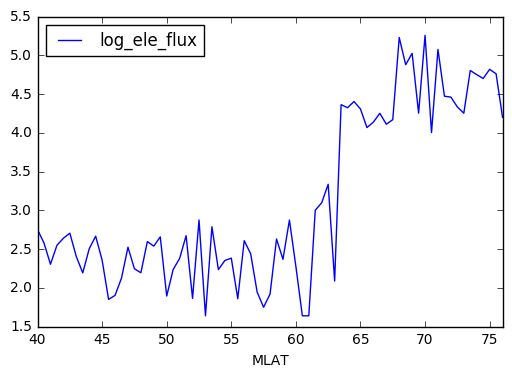

In [5]:
eleMlatMean[eleMlatMean["sat"] == "m02"].plot( x="MLAT", y="log_ele_flux" )

In [6]:
proMlatMean[proMlatMean["sat"] == "n19"].head()

,MLAT,sat,timestamp,aacgm_lat_foot,aacgm_lon_foot,MLT,log_pro_flux,dateStr,time
73,51.5,n19,1.434534e+12,51.689999,320.029999,1.970000,3.107854,20150617.0,944.0
81,52.5,n19,1.434534e+12,52.580002,320.290009,1.980000,2.980730,20150617.0,944.0
83,53.0,n19,1.434534e+12,52.974998,320.410004,1.990000,2.270405,20150617.0,944.0
87,53.5,n19,1.434534e+12,53.470001,320.559998,2.000000,3.016699,20150617.0,944.0
92,54.5,n19,1.434534e+12,54.443333,320.866669,2.013333,2.074339,20150617.0,944.0


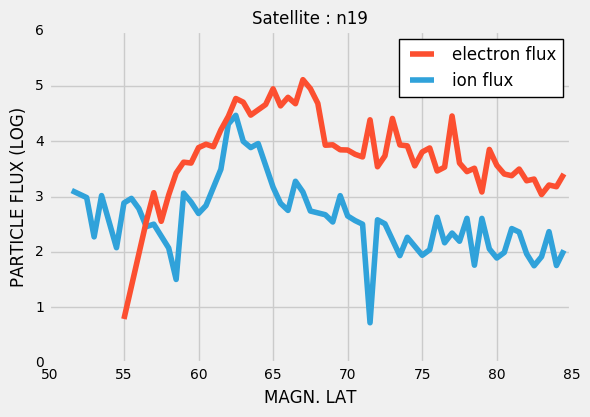

In [32]:
selSat = "n19"

with plt.style.context('fivethirtyeight'):
    ax = plt.subplot(1,1,1)
    p1, = ax.plot(proMlatMean[proMlatMean["sat"] == selSat]["MLAT"], \
                 proMlatMean[proMlatMean["sat"] == selSat]["log_pro_flux"], label="ion flux")
    p2, = ax.plot(eleMlatMean[eleMlatMean["sat"] == selSat]["MLAT"], \
                 eleMlatMean[eleMlatMean["sat"] == selSat]["log_ele_flux"], label="electron flux")
    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
ax.set_xlabel( "MAGN. LAT" )
ax.set_ylabel( "PARTICLE FLUX (LOG)" )
ax.set_title("Satellite : " + selSat)
plt.show()

ax.get_figure().savefig("../figs/poesFluxCmpr-" + selSat + ".pdf",bbox_inches='tight')